In [107]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [109]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3238,ham,Am okay. Will soon be over. All the best,NaN,NaN,NaN
3161,ham,I can't describe how lucky you are that I'm ac...,NaN,NaN,NaN
4627,spam,Todays Voda numbers ending with 7634 are selec...,NaN,NaN,NaN
4213,ham,Ard 530 like dat lor. We juz meet in mrt stati...,NaN,NaN,NaN
4136,ham,Just got to &lt;#&gt;,NaN,NaN,NaN


In [110]:
df.shape

(5572, 5)

In [111]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [113]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [114]:
df.sample(5)

,v1,v2
5524,spam,You are awarded a SiPix Digital Camera! call 0...
3715,ham,Networking technical support associate.
4030,ham,"Sorry vikky, i'm Watching olave mandara movie ..."
1235,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...


In [115]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1964,ham,Honeybee Said: *I'm d Sweetest in d World* God...
904,ham,"We're all getting worried over here, derek and..."
3263,ham,I will send them to your email. Do you mind &...
4059,spam,This weeks SavaMob member offers are now acces...
2815,ham,Genius what's up. How your brother. Pls send h...


In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [117]:
df['target'] = encoder.fit_transform(df['target'])

In [118]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [120]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [121]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df.shape

(5169, 2)

## 2.EDA

In [124]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [126]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


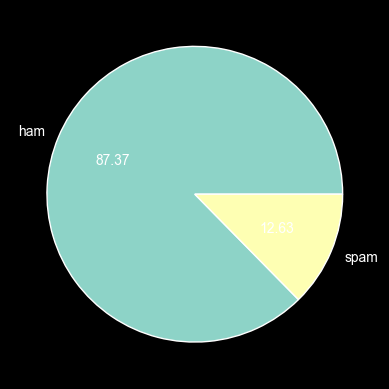

In [127]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [128]:
# Data is imbalanced

In [129]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [131]:
import nltk
import ssl

# SSL bypass (if still needed)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download the specific required resource
nltk.download('punkt_tab')

# Verify it works
print(nltk.data.find('tokenizers/punkt_tab/english'))


/Users/nishadkotkar/nltk_data/tokenizers/punkt_tab/english


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nishadkotkar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [132]:
import nltk

In [133]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nishadkotkar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [134]:
df['num_characters'] = df['text'].apply(len)

In [135]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [136]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [137]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [138]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [139]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [140]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [142]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [143]:
import seaborn as sns

In [144]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_characters', ylabel='Count'>

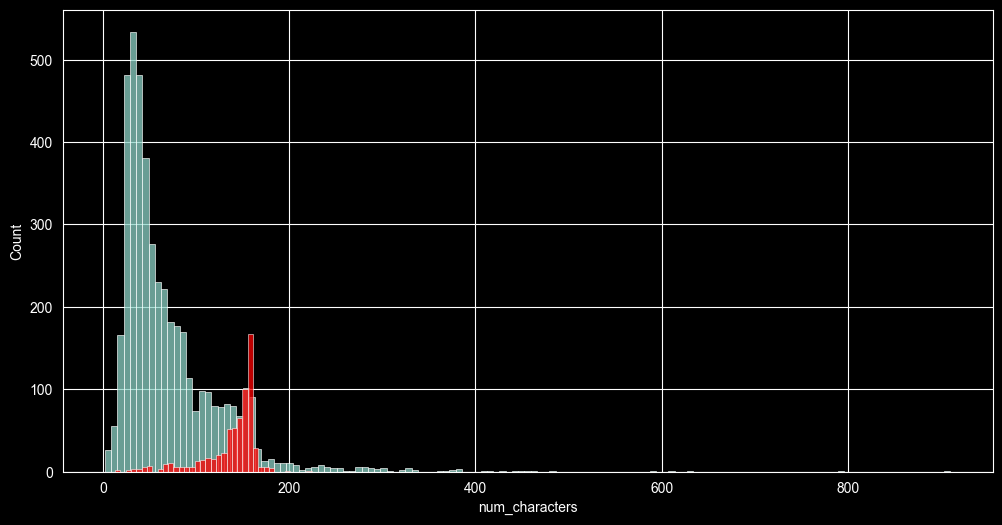

In [145]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

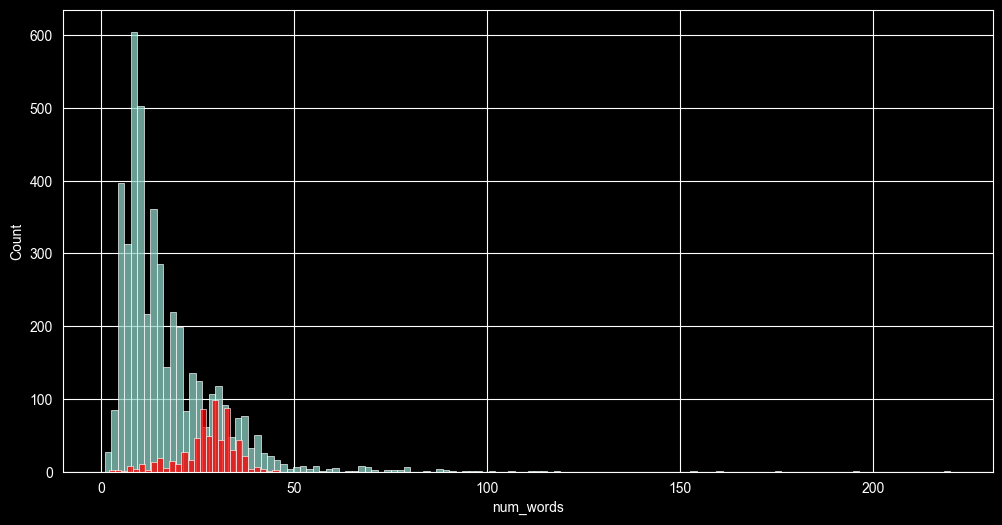

In [146]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

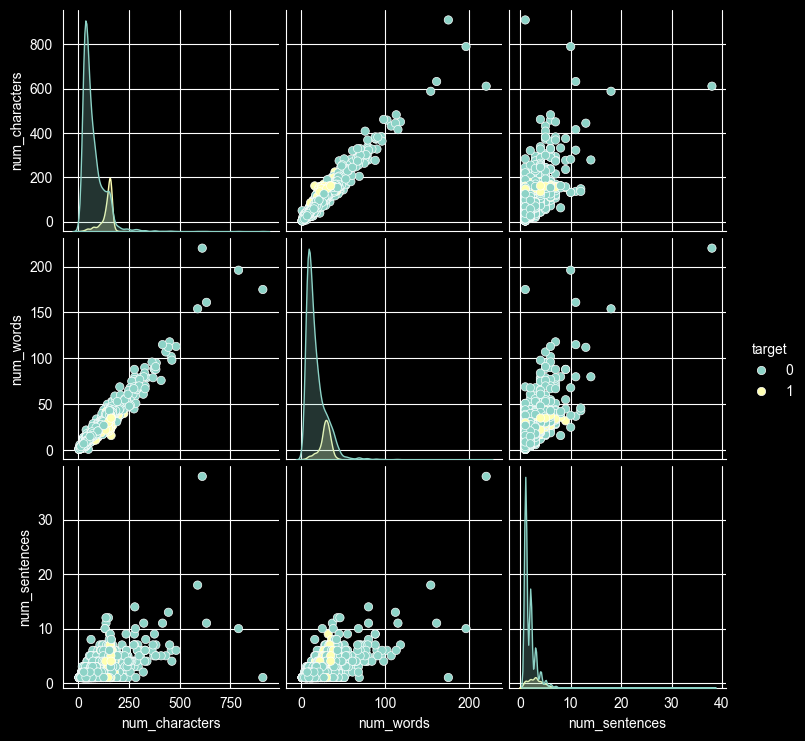

In [147]:
sns.pairplot(df,hue='target')

<Axes: >

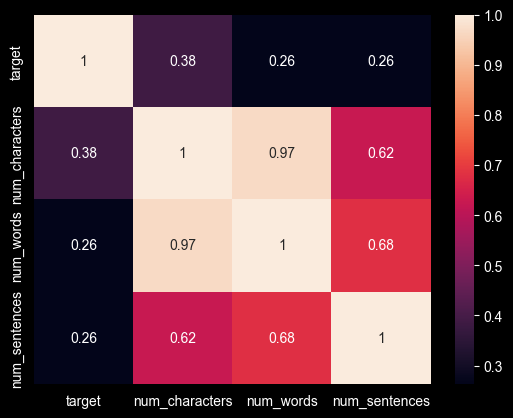

In [148]:
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True)


In [149]:
# significant correlation is present so we can't use all of them as it will lead to problem of autocorrelation

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [150]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.stem import PorterStemmer as ps
ps_stemmer = ps()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishadkotkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nishadkotkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [151]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

   
    for i in text:
        for i in text:
            y.append(ps_stemmer.stem(i))  
    
            
    return " ".join(y)

In [152]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today gon na home soon want talk stuff anymor tonight k cri enough today'

In [153]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [154]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [155]:
df['transformed_text'] = df['text'].apply(transform_text)

In [156]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar joke wif u oni ok...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though nah think...


In [157]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [158]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [159]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

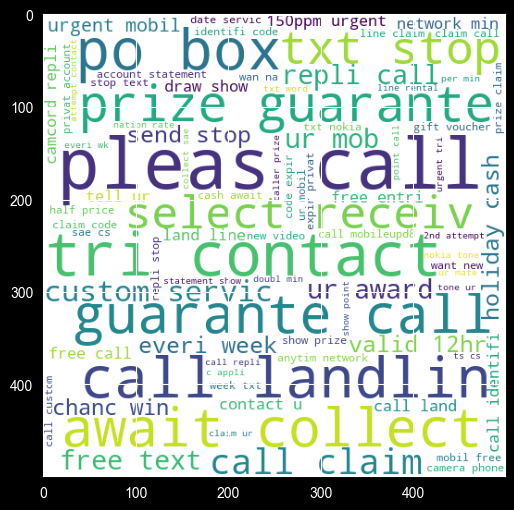

In [160]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [161]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

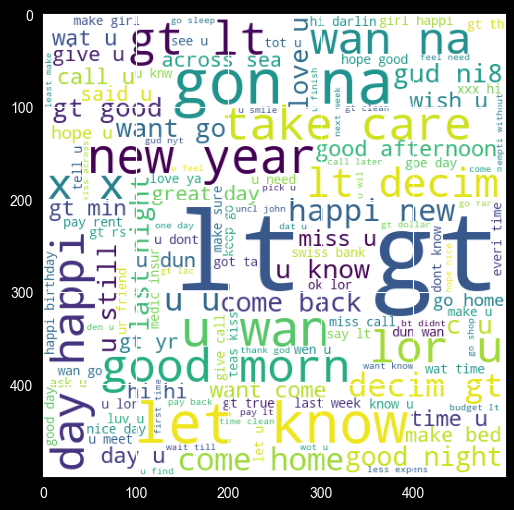

In [162]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar joke wif u oni ok...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though nah think...


In [164]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [165]:
len(spam_corpus)

166139

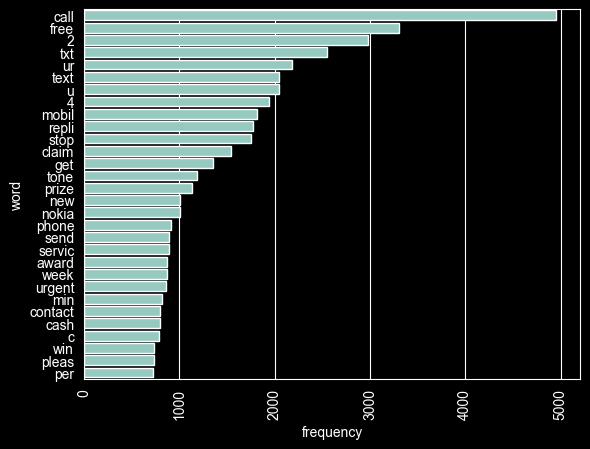

In [166]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                         columns=['word', 'frequency'])

sns.barplot(data=word_freq, x='frequency', y='word')
plt.xticks(rotation='vertical')
plt.show()


In [167]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [168]:
len(ham_corpus)

445690

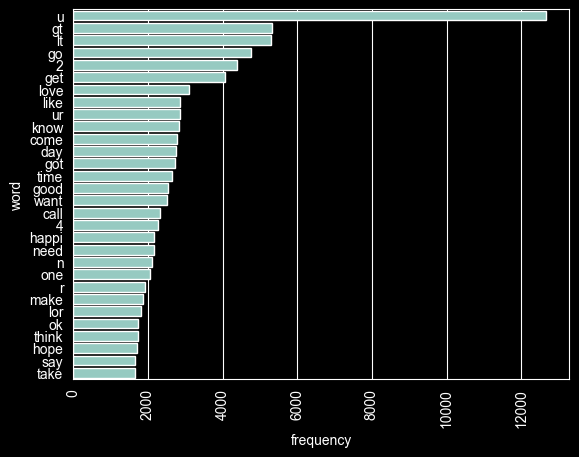

In [169]:
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), 
                         columns=['word', 'frequency'])

sns.barplot(data=word_freq, x='frequency', y='word')
plt.xticks(rotation='vertical')
plt.show()

In [170]:
# Text Vectorization
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar joke wif u oni ok...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though nah think...


## 4. Model Building

In [171]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [172]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [173]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [174]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [175]:
X.shape

(5169, 3000)

In [176]:
y = df['target'].values

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [180]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.839458413926499
[[754 142]
 [ 24 114]]
0.4453125


In [182]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[895   1]
 [ 29 109]]
0.990909090909091


In [183]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [184]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   4]
 [ 17 121]]
0.968


In [185]:
# tfidf --> MNB

In [186]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [188]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [189]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

In [190]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [191]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9583333333333334)

In [192]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  0.990909090909091
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8349514563106796
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117


/Users/nishadkotkar/Desktop/4-1/Proj/NLP-Campusx/email-spam/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/nishadkotkar/Desktop/4-1/Proj/NLP-Campusx/email-spam/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8390804597701149
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8473282442748091
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9411764705882353


In [193]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [194]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.970986,0.990909
5,RF,0.973888,0.982609
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.958333
4,LR,0.956480,0.951456
9,GBDT,0.953578,0.941176
7,BgC,0.954545,0.847328
6,AdaBoost,0.923598,0.839080
3,DT,0.933269,0.834951


In [195]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [196]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.956480
6,GBDT,Accuracy,0.953578
7,BgC,Accuracy,0.954545
8,AdaBoost,Accuracy,0.923598
9,DT,Accuracy,0.933269


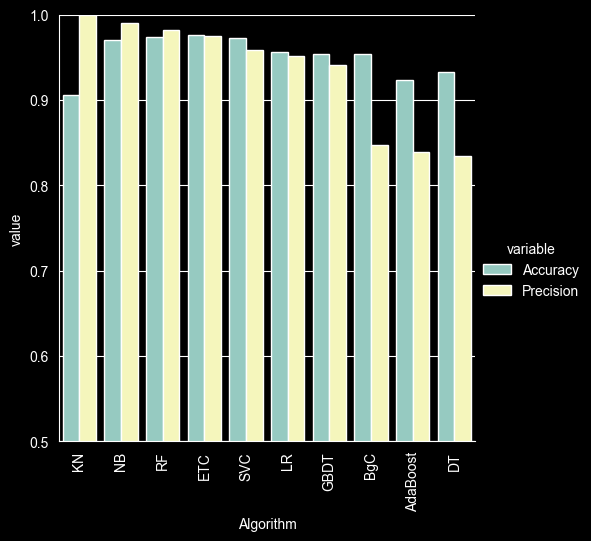

In [197]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [198]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [199]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [201]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [202]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [203]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [204]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.970986,0.990909,0.970986,0.990909,0.970986,0.990909,0.970986,0.990909
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,SVC,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
5,LR,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,GBDT,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176,0.953578,0.941176
7,BgC,0.954545,0.847328,0.954545,0.847328,0.954545,0.847328,0.954545,0.847328
8,AdaBoost,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080
9,DT,0.933269,0.834951,0.933269,0.834951,0.933269,0.834951,0.933269,0.834951


In [205]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [206]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [207]:
voting.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [208]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


In [209]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [210]:
from sklearn.ensemble import StackingClassifier

In [211]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [212]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.924812030075188
